In [109]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

In [110]:
points = ([[5,8],
            [6,7],
            [6,5],
            [2,4],
            [3,4],
            [5,4],
            [7,4],
            [9,4],
            [3,3],
            [8,2],
            [7,5]])

data = pd.DataFrame(points)

data.head()

,0,1
0,5,8
1,6,7
2,6,5
3,2,4
4,3,4


<AxesSubplot:xlabel='0', ylabel='1'>

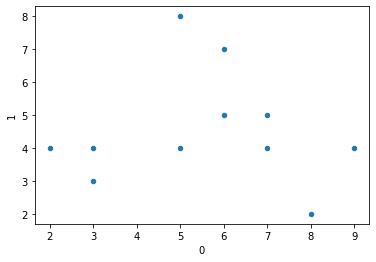

In [111]:
data.plot.scatter(0, 1)

In [116]:
test_bases = {0: [2, 5, lambda x,y:np.max(np.abs(x-y))],
             1: [4, 3, lambda x,y:pow(np.sum(np.sqrt(np.abs(x-y))), 2)],
             2: [1, 6, lambda x,y:np.min(np.abs(x-y))],
             3: [4, 6, lambda x,y: np.sum([2**i * (x[i] - y[i]) **2 for i in range(len(x))]) ** (1 / 2)]}

{0, -1}
1
0.18181818181818182
{0, -1}
1
0.09090909090909091
{0}
0
0.0
{0, -1}
1
0.09090909090909091


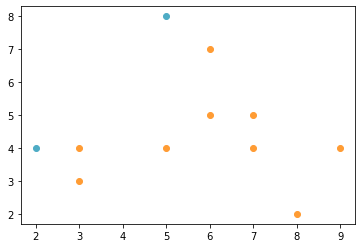

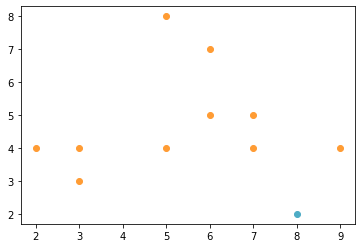

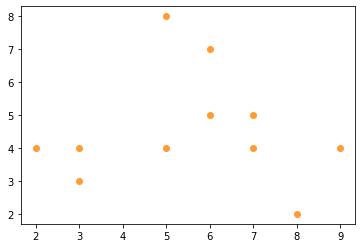

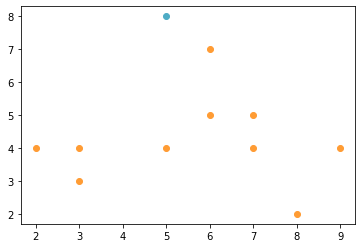

In [117]:
for i in range(len(test_bases)):
    clustering = DBSCAN(eps=test_bases[i][0],
                        min_samples=test_bases[i][1],
                        metric=test_bases[i][2]).fit(data)

    print(set(clustering.labels_))
    print(len(set(clustering.labels_)) -1)
    print(list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    labels = clustering.labels_ + 1

    for i, row in data.iterrows():
        plt.scatter(row[0], row[1], c=colors[labels[i]])

    plt.show()
